In [107]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from spacy.lang.pt.stop_words import STOP_WORDS
import string
import en_core_web_sm
import random
import re
from spacy.training import Example
from sklearn.metrics import accuracy_score

In [108]:
pln = en_core_web_sm.load()

In [109]:
df_train = pd.read_csv('../Bases de dados/Train50.csv', sep=';')
df_train.columns = df_train.columns.str.strip()


In [110]:
stop_word = STOP_WORDS

In [111]:
punctations = string.punctuation

In [112]:
df_train.drop(columns=['id','tweet_date','query_used'],axis=1, inplace=True)
df_train

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1
...,...,...
49995,:( é tão lindo que dói https://t.co/GqnpgyWWxB,0
49996,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",0
49997,eu te amo tanto minja vidinha meu bem mais pre...,0
49998,@itsLary @jessboluda Pfvor :(,0


In [113]:
def preprocessing(text):
    word=[]
    new_text = text.lower()
    new_text = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', new_text)
    new_text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', new_text)
    new_text = re.sub(r" +", ' ', new_text)
    list_emotions = {':)': 'emocaopositiva',
                   ':d': 'emocaopositiva',
                   ':(': 'emocaonegativa'}
    for emocao in list_emotions:
       new_text = new_text.replace(emocao, list_emotions[emocao])
     
    new_text_doc = pln(new_text)
    for t in new_text_doc:
         word.append(t.lemma_)
    word =[w for w in word if w not in stop_word and w not in punctations]
    word = ' '.join([str(element) for element in word if not element.isdigit()])

    return word

In [114]:
result_test = preprocessing('@Laranjito76 A pessoa certa para isso seria o vale e azevedo :)')
result_test

'  pessoa certa vale azevedo emocaopositiva'

In [115]:
df_train['tweet_text'] = df_train['tweet_text'].apply(preprocessing)
df_train

,tweet_text,sentiment
0,pessoa certa vale azevedo emocaopositiva,1
1,mim precisamente contrário emocaopositiva ch...,1
2,vou video hoje ... pensando falar meta csgo pa...,1
3,aaaaaaaa amei polaroid expressar to apaixonada...,1
4,valoriza coração menininho vc diferente faça s...,1
...,...,...
49995,emocaonegativa lindo dói,0
49996,.. problema c/ coisas .. toc emocaonegativa ...,0
49997,amo minja vidinha precioso I desculpa péssima ...,0
49998,pfvor emocaonegativa,0


In [116]:
list_new_data=[]
for t,e in zip(df_train['tweet_text'],df_train['sentiment']):
        if e == 1:
            dic = {'POSITIVO':True, 'NEGATIVO':False}
        else:
            dic = {'POSITIVO':False, 'NEGATIVO':True}
        list_new_data.append([t,dic.copy()])

In [117]:
len(list_new_data)
list_new_data[10:15]

[['simplesmente coisas I deixam chateada coisas muitooo I iludir emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['começa rotina perfeitamente consolidar escola condução :p',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['amigo apaixonado vc — recíproco emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['  gajo bacano vê I aleijas espero silva sejam felize emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['tou video cabrinhas bebés emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}]]

In [118]:
model = spacy.blank('pt')
categori =model.add_pipe('textcat')
categori.add_label('POSITIVO')
categori.add_label('NEGATIVO')
historic=[]

In [119]:
model.initialize()
list_predict=[]

for era in range(5):
    random.shuffle(list_new_data)
    losses={}
    for batch in spacy.util.minibatch(list_new_data,512):
        text=[model(text) for text, entities in batch]
        annotations = [{'cats': entities} for text, entities in batch]
        examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            text, annotations
        )]
        model.update(examples, losses=losses)
        historic.append(losses)
    if era % 5 == 0:
        print(losses)


{'textcat': 1.7926174741767227}


In [120]:
historic_loss = []
for i in historic:
  historic_loss.append(i.get('textcat'))

In [121]:
historic_loss = np.array(historic_loss)

In [122]:
historic_loss

array([1.79261747, 1.79261747, 1.79261747, 1.79261747, 1.79261747,
       1.79261747, 1.79261747, 1.79261747, 1.79261747, 1.79261747,
       1.79261747, 1.79261747, 1.79261747, 1.79261747, 1.79261747,
       1.79261747, 1.79261747, 1.79261747, 1.79261747, 1.79261747,
       1.79261747, 1.79261747, 1.79261747, 1.79261747, 1.79261747,
       1.79261747, 1.79261747, 1.79261747, 1.79261747, 1.79261747,
       1.79261747, 1.79261747, 1.79261747, 1.79261747, 1.79261747,
       1.79261747, 1.79261747, 1.79261747, 1.79261747, 1.79261747,
       1.79261747, 1.79261747, 1.79261747, 1.79261747, 1.79261747,
       1.79261747, 1.79261747, 1.79261747, 1.79261747, 1.79261747,
       1.79261747, 1.79261747, 1.79261747, 1.79261747, 1.79261747,
       1.79261747, 1.79261747, 1.79261747, 1.79261747, 1.79261747,
       1.79261747, 1.79261747, 1.79261747, 1.79261747, 1.79261747,
       1.79261747, 1.79261747, 1.79261747, 1.79261747, 1.79261747,
       1.79261747, 1.79261747, 1.79261747, 1.79261747, 1.79261

Text(0, 0.5, 'Error')

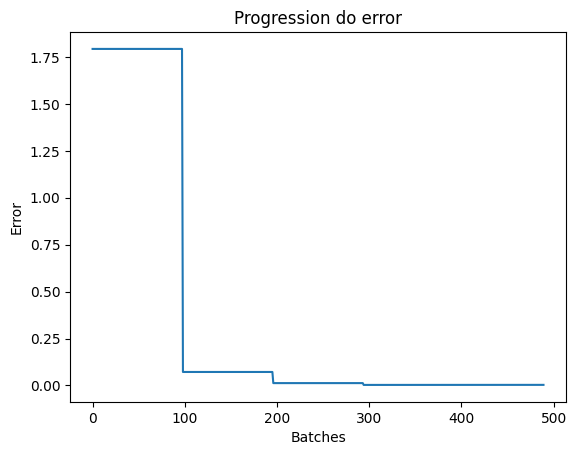

In [123]:
import matplotlib.pyplot as plt
plt.plot(historic_loss)
plt.title('Progression do error')
plt.xlabel('Batches')
plt.ylabel('Error')

In [124]:
df_base_test = pd.read_csv('../Bases de dados/Test.csv',sep=';')
df_base_test.columns = df_base_test.columns.str.strip()
df_base_test.drop(columns=['id','tweet_date','query_used'],axis=1, inplace=True)
df_base_test

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1
...,...,...
4995,@ol_cdanilo parece livro de autoajuda :(,0
4996,@tatazoquita aaaaa sinto muito :((,0
4997,To começando a sentir dor de novo e meu irmão ...,0
4998,@ichbintw parece que no dia que toma a vacina ...,0


In [125]:
df_base_test['tweet_text'] = df_base_test['tweet_text'].apply(preprocessing)
df_base_test

,tweet_text,sentiment
0,emocaopositiva,1
1,pa puta pariu emocaopositiva,1
2,desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 confira link ➔ » co...,1
3,vou vcs I ajudem galera amor butera emocaoposi...,1
4,estávamos casa zé morrer sono chego casa fico ...,1
...,...,...
4995,livro autoajuda emocaonegativa,0
4996,aaaaa sinto emocaonegativa,0
4997,to começando sentir dor irmão sumiu remédio em...,0
4998,dia toma vacina n beber emocaonegativa,0


In [ ]:
list_new_data=[]
for t,e in zip(df_base_test['tweet_text'],df_base_test['sentiment']):
        if e == 1:
            dic = {'POSITIVO':True, 'NEGATIVO':False}
        else:
            dic = {'POSITIVO':False, 'NEGATIVO':True}
        list_new_data.append([t,dic.copy()])

In [126]:
predictions = []
for texto in df_base_test:
  prediction = model(texto)
  predictions.append(prediction.cats)

In [127]:
final_predictions = []
for prediction in predictions:
  if prediction['POSITIVO'] > prediction['NEGATIVO']:
    final_predictions.append(1)
  else:
    final_predictions.append(0)

final_predictions = np.array(final_predictions)

In [131]:
accuracy_score(df_base_test['sentiment'],final_predictions)

ValueError: Found input variables with inconsistent numbers of samples: [5000, 2]